## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how = "outer")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
#checking for incomplete rows of data
combined_data.count()
#checking data types to see if needing to be reformated (all correct)
combined_data.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [10]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].count()
mice_count

1893

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
                                      
duplicated_combined_data = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]

duplicated_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = combined_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
cleanDF

#wanting to check data 
cleanDF.to_csv("Output/cleanDF.csv",
                encoding="utf-8", index=False, header=True)            
               

In [13]:
# Checking the number of mice in the clean DataFrame.
cleanDF.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
cleanDF.head()
SummaryDF = cleanDF.groupby(["Drug Regimen"])
SummaryDF.head()

mean = SummaryDF["Tumor Volume (mm3)"].mean()
median = SummaryDF["Tumor Volume (mm3)"].median()
variance = SummaryDF["Tumor Volume (mm3)"].var()
stddev = SummaryDF["Tumor Volume (mm3)"].std()
SEM = SummaryDF["Tumor Volume (mm3)"].sem()

TTLSummaryDF = pd.DataFrame({"Mean of Tumor Volume" : mean,
                 "Median of Tumor Volume" : median,
                 "Variance of Tumor Volume": variance,
                 "Standard Deviation of Tumor Volume": stddev,
                 "SEM of Tumor Volume" : SEM})
TTLSummaryDF


,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

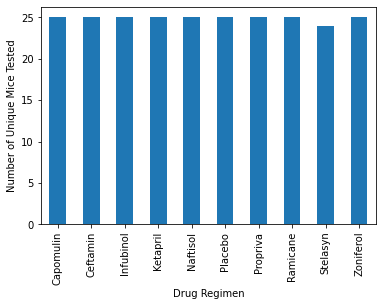

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
cleanDF.head()
Drugs = cleanDF.groupby("Drug Regimen")
num_of_drugs = Drugs["Mouse ID"].nunique()
num_of_drugs_chart = num_of_drugs.plot(kind="bar")
num_of_drugs_chart.set_ylabel("Number of Unique Mice Tested")

Text(0, 0.5, '# of Mice')

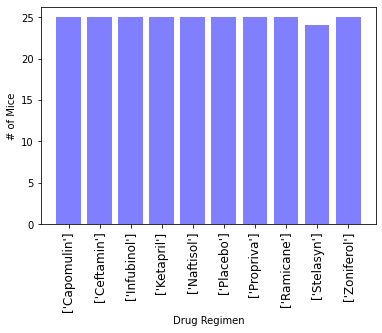

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

DrugsDF = cleanDF.groupby("Drug Regimen")
Drugs = DrugsDF["Drug Regimen"].unique()
x_axis = np.arange(len(Drugs))
unique_mice = DrugsDF["Mouse ID"].nunique()

plt.bar(x_axis, unique_mice, color = "b", alpha=0.5, align ="center")
tick_locations = [drug for drug in x_axis]
plt.xticks(tick_locations, Drugs, rotation = 90 )
plt.tick_params(axis="x", which = "major", labelsize=12)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

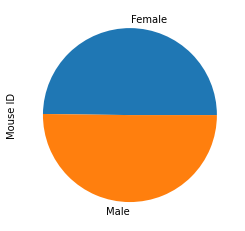

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cleanDF.head()
MF_grouped = cleanDF.groupby("Sex")
ttl_mice = MF_grouped["Mouse ID"].nunique()
ttl_mice_pie = ttl_mice.plot(kind="pie")
ttl_mice_pie


([<matplotlib.patches.Wedge at 0x1ce20b65e20>,
 [Text(-0.7771287477781476, -0.9143691319028482, 'Female Mice'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male Mice')],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

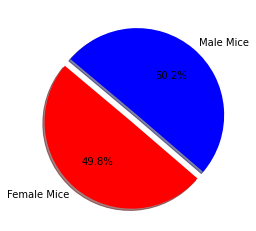

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
cleanDF.head()
MF_grouped = cleanDF.groupby("Sex")
ttl_mice = MF_grouped["Mouse ID"].nunique()

ttl_mice.value_counts()
colors = ["red", "blue"]
labels = ["Female Mice", "Male Mice"]
explode = (0.1, 0)
plt.pie(ttl_mice, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140 )

## Quartiles, Outliers and Boxplots

In [12]:
cleanDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
promisingDF = cleanDF[cleanDF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
promisingDF.sort_values(["Timepoint"], ascending=True)

promisingDF_data = promisingDF[["Drug Regimen", "Mouse ID", "Timepoint","Tumor Volume (mm3)"]]
promisingDF_data.head(10)
final_tumor_data = promisingDF_data[promisingDF_data["Timepoint"].isin(["45"])]
final_tumor_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
9,Ramicane,k403,45,22.050126
19,Capomulin,s185,45,23.343598
29,Capomulin,x401,45,28.484033
39,Capomulin,m601,45,28.430964
49,Ramicane,g791,45,29.128472
...,...,...,...,...
1797,Ceftamin,x822,45,61.386660
1813,Infubinol,y163,45,67.685569
1845,Ceftamin,y769,45,68.594745
1855,Ceftamin,y865,45,64.729837


In [23]:
Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#Allfinal_Tumor_Volume = final_tumor_data["Tumor Volume (mm3)"]

Cap_final_data = final_tumor_data[final_tumor_data["Drug Regimen"].isin(["Capomulin"])]
Cap_final_data
Cap_final_Tumor_Volume = Cap_final_data["Tumor Volume (mm3)"]
Cap_final_Tumor_Volume

Ram_final_data = final_tumor_data[final_tumor_data["Drug Regimen"].isin(["Ramicane"])]
Ram_final_data
Ram_final_Tumor_Volume = Ram_final_data["Tumor Volume (mm3)"]
Ram_final_Tumor_Volume

Inf_final_data = final_tumor_data[final_tumor_data["Drug Regimen"].isin(["Infubinol"])]
Inf_final_data
Inf_final_Tumor_Volume = Inf_final_data["Tumor Volume (mm3)"]
Inf_final_Tumor_Volume

Cet_final_data = final_tumor_data[final_tumor_data["Drug Regimen"].isin(["Ceftamin"])]
Cet_final_data
Cet_final_Tumor_Volume = Cet_final_data["Tumor Volume (mm3)"]
Cet_final_Tumor_Volume



quartiles = Cap_final_Tumor_Volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


quartiles = Ram_final_Tumor_Volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

quartiles = Inf_final_Tumor_Volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

quartiles = Cet_final_Tumor_Volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)






{'whiskers': [<matplotlib.lines.Line2D at 0x1986a0cc130>,
 'caps': [<matplotlib.lines.Line2D at 0x1986a0cc7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1986a0bfd90>,
 'medians': [<matplotlib.lines.Line2D at 0x1986a0cceb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1986a0d51f0>,
 'means': []}

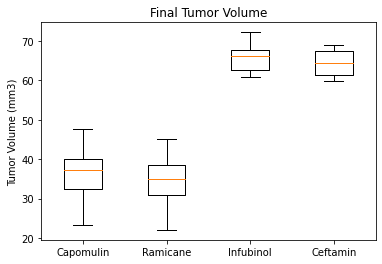

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
data = [Cap_final_Tumor_Volume, Ram_final_Tumor_Volume,Inf_final_Tumor_Volume,Cet_final_Tumor_Volume]

ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, labels = Drugs)




## Line and Scatter Plots

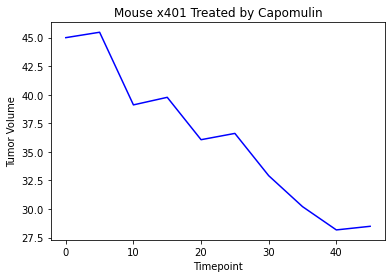

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cleanDF.head()
CapomulinDF = cleanDF[cleanDF["Drug Regimen"].isin(["Capomulin"])]
MouseDF = CapomulinDF[CapomulinDF["Mouse ID"].isin(["x401"])]

MouseDF
Mouse_timepoint = MouseDF["Timepoint"]
Mouse_Tumor_Volume = MouseDF["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")    
plt.ylabel("Tumor Volume")
plt.title("Mouse x401 Treated by Capomulin")
Mouse_line = plt.plot(Mouse_timepoint, Mouse_Tumor_Volume, color = "blue", label= "Mouse x401")



Text(0, 0.5, 'Avg Tumor Size')

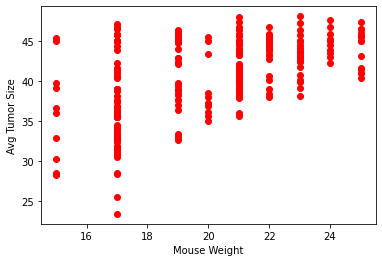

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cleanDF.head()
CapomulinDF = cleanDF[cleanDF["Drug Regimen"].isin(["Capomulin"])]
#CapomulinDF = CapomulinDF.groupby(["Mouse ID"])
avg_tumor_volume = CapomulinDF["Tumor Volume (mm3)"]
mouse_weight = CapomulinDF["Weight (g)"]
plt.scatter(mouse_weight, avg_tumor_volume, marker ="o", color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Size")

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)


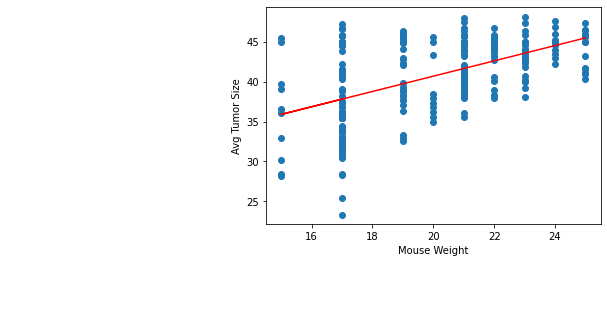

In [28]:
x_values = mouse_weight
y_values = avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Size")
plt.show()